In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# We'll create a similar code snippet that will generate longitudes. To ensure enough latitudes and longitudes, 
# we'll start with 1,500. In addition, we'll pack the latitudes (lats) and longitudes (lngs) as pairs by zipping 
# them (lat_lngs) with the zip() function.

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# ^^^^^^^^^^^^
# The zip object packs each pair of lats and lngs having the same index 
# in their respective array into a tuple. If there are 1,500 latitudes 
# and longitudes, there will be 1,500 tuples of paired latitudes and 
# longitudes, where each latitude and longitude in a tuple can be accessed 
# by the index of 0 and 1, respectively.
### list(lat_lngs)    # <<<<<------ list unzips the tuple

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)   # <<<<<------ list unzips the tuple

# You can only unzip a zipped tuple once before it is removed from the
# computer's memory. Make sure you unzip the latitudes and longitudes 
# into the coordinates list before moving on.

In [5]:
lat_lngs

In [6]:
coordinates[1499]

(12.297366125872841, -175.23473492272927)

In [7]:
coordinates[1499][0]

12.297366125872841

In [8]:
coordinates[1499][1]

-175.23473492272927

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

# The citipy module finds the nearest city to the latitude and longitude 
# pair with a population of 500 or more.
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

651

In [10]:
#cities

In [11]:
# import requests
# requests.__version__

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

## ---> The code will return error as the index is a number and not the city name. The url created will not be good.
## Loop through all the cities in our list.
#for i in range(len(cities)):

#    # Group cities in sets of 50 for logging purposes.
#    if (i % 50 == 0 and i >= 50):
#        set_count += 1
#        record_count = 1
#    # Create endpoint URL with each city.
#    city_url = url + "&q=" + cities[i]
## <----    

# Lets's use Enumerate Method instead...
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
#  OR     continue

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | eufaula
Processing Record 2 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | filingue
Processing Record 5 of Set 1 | saint george
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | tlahualilo
City not found. Skipping...
Processing Record 10 of Set 1 | mahebourg
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | dingle
Processing Record 13 of Set 1 | road town
Processing Record 14 of Set 1 | ryotsu
Processing Record 15 of Set 1 | quatre cocos
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | tura
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 | lagoa
Processing Record 2

Processing Record 36 of Set 4 | kununurra
Processing Record 37 of Set 4 | nuuk
Processing Record 38 of Set 4 | barela
Processing Record 39 of Set 4 | sumter
Processing Record 40 of Set 4 | kisangani
Processing Record 41 of Set 4 | puerto escondido
Processing Record 42 of Set 4 | altay
Processing Record 43 of Set 4 | faanui
Processing Record 44 of Set 4 | purna
Processing Record 45 of Set 4 | saint-philippe
Processing Record 46 of Set 4 | taltal
Processing Record 47 of Set 4 | tubruq
City not found. Skipping...
Processing Record 48 of Set 4 | rusanj
Processing Record 49 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 50 of Set 4 | atar
Processing Record 1 of Set 5 | souillac
Processing Record 2 of Set 5 | roma
Processing Record 3 of Set 5 | vysokogornyy
Processing Record 4 of Set 5 | vadso
Processing Record 5 of Set 5 | bundaberg
Processing Record 6 of Set 5 | kisaran
Processing Record 7 of Set 5 | tucurui
Processing Record 8 of Set 5 | kawana waters
City not found. Sk

Processing Record 27 of Set 8 | haines junction
Processing Record 28 of Set 8 | sisimiut
Processing Record 29 of Set 8 | manggar
Processing Record 30 of Set 8 | general pico
Processing Record 31 of Set 8 | kayes
Processing Record 32 of Set 8 | rabo de peixe
Processing Record 33 of Set 8 | nelson bay
Processing Record 34 of Set 8 | gat
Processing Record 35 of Set 8 | sinnamary
Processing Record 36 of Set 8 | buraydah
Processing Record 37 of Set 8 | omsukchan
Processing Record 38 of Set 8 | surin
Processing Record 39 of Set 8 | marcona
City not found. Skipping...
Processing Record 40 of Set 8 | saint-pierre
Processing Record 41 of Set 8 | taft
Processing Record 42 of Set 8 | lodja
Processing Record 43 of Set 8 | namibe
Processing Record 44 of Set 8 | pemangkat
Processing Record 45 of Set 8 | mutsamudu
City not found. Skipping...
Processing Record 46 of Set 8 | kuzhener
Processing Record 47 of Set 8 | mariinskiy posad
Processing Record 48 of Set 8 | davidson
Processing Record 49 of Set 8 

Processing Record 14 of Set 12 | amfiklia
Processing Record 15 of Set 12 | miranda
Processing Record 16 of Set 12 | khlung
Processing Record 17 of Set 12 | serebryanyy bor
Processing Record 18 of Set 12 | khonuu
City not found. Skipping...
Processing Record 19 of Set 12 | bosansko grahovo
Processing Record 20 of Set 12 | babanusah
City not found. Skipping...
Processing Record 21 of Set 12 | newport
Processing Record 22 of Set 12 | port shepstone
Processing Record 23 of Set 12 | mantua
Processing Record 24 of Set 12 | comodoro rivadavia
Processing Record 25 of Set 12 | pacasmayo
Processing Record 26 of Set 12 | vangaindrano
Processing Record 27 of Set 12 | ewa beach
Processing Record 28 of Set 12 | beyneu
Processing Record 29 of Set 12 | bilma
Processing Record 30 of Set 12 | axim
Processing Record 31 of Set 12 | vagur
Processing Record 32 of Set 12 | terrace bay
Processing Record 33 of Set 12 | danilov
Processing Record 34 of Set 12 | hofn
Processing Record 35 of Set 12 | mrirt
City no

In [13]:
len(city_data)

598

In [14]:
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Eufaula,31.8913,-85.1455,75.85,98,100,4.32,US,2021-09-08 13:03:41
1,Mataura,-46.1927,168.8643,43.48,83,100,10.29,NZ,2021-09-08 13:03:41
2,Filingue,14.3521,3.3168,92.93,39,69,12.75,NE,2021-09-08 13:03:41
3,Saint George,37.1041,-113.5841,74.53,14,0,4.09,US,2021-09-08 12:58:51
4,Yellowknife,62.4560,-114.3525,43.95,82,100,4.83,CA,2021-09-08 13:01:40
...,...,...,...,...,...,...,...,...,...
593,Pangody,65.8500,74.4859,48.85,50,67,8.16,RU,2021-09-08 13:06:41
594,Gamba,-2.6500,10.0000,81.63,63,49,11.74,GA,2021-09-08 13:06:41
595,Vestmannaeyjar,63.4427,-20.2734,52.79,76,40,10.36,IS,2021-09-08 13:03:12
596,Ginir,7.1333,40.7000,72.95,49,73,11.21,ET,2021-09-08 13:06:42


In [15]:
# Reorder the columns
reorder_columns =["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[reorder_columns]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Eufaula,US,2021-09-08 13:03:41,31.8913,-85.1455,75.85,98,100,4.32
1,Mataura,NZ,2021-09-08 13:03:41,-46.1927,168.8643,43.48,83,100,10.29
2,Filingue,NE,2021-09-08 13:03:41,14.3521,3.3168,92.93,39,69,12.75
3,Saint George,US,2021-09-08 12:58:51,37.1041,-113.5841,74.53,14,0,4.09
4,Yellowknife,CA,2021-09-08 13:01:40,62.4560,-114.3525,43.95,82,100,4.83
...,...,...,...,...,...,...,...,...,...
593,Pangody,RU,2021-09-08 13:06:41,65.8500,74.4859,48.85,50,67,8.16
594,Gamba,GA,2021-09-08 13:06:41,-2.6500,10.0000,81.63,63,49,11.74
595,Vestmannaeyjar,IS,2021-09-08 13:03:12,63.4427,-20.2734,52.79,76,40,10.36
596,Ginir,ET,2021-09-08 13:06:42,7.1333,40.7000,72.95,49,73,11.21


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

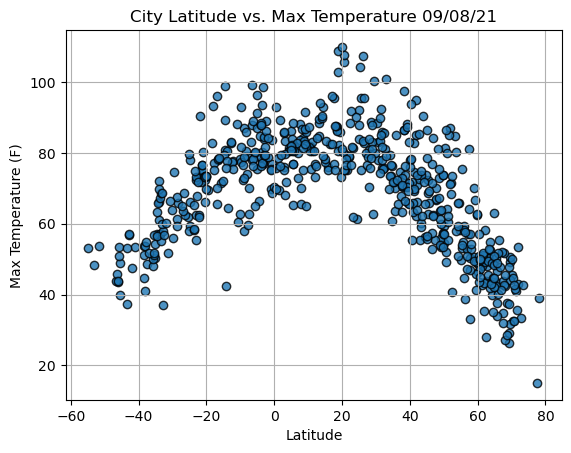

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

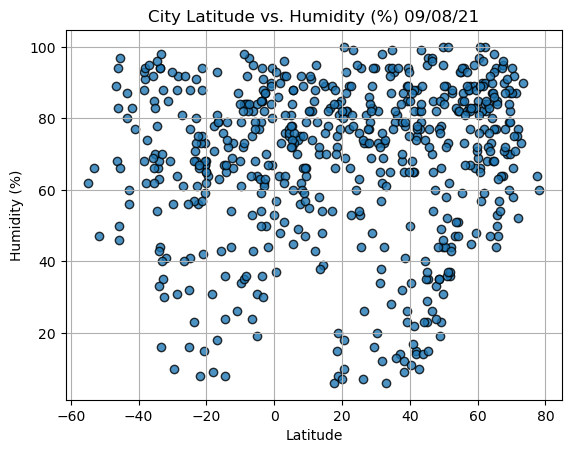

In [24]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

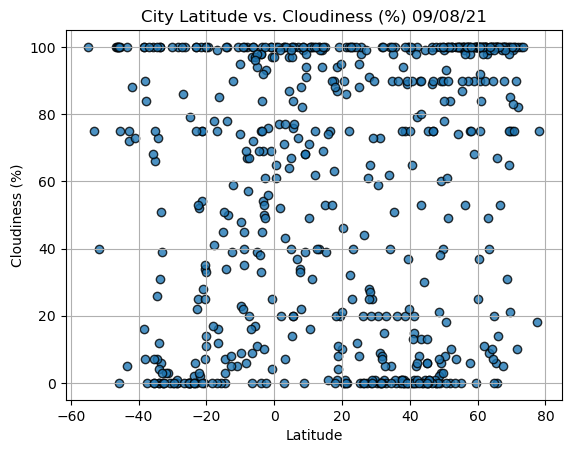

In [25]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

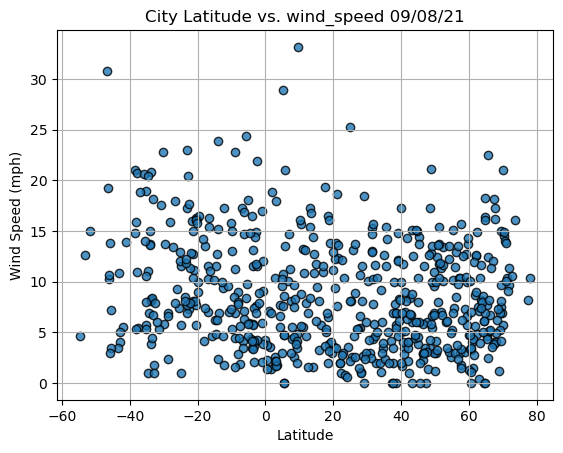

In [27]:
# Build the scatter plot for latitude vs. wind_speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. wind_speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()